### Dataset Description

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                'marital-status', 'occupation', 'relationship', 'race', 'sex', 
                'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
                'class']

data = data.drop(['fnlwgt', 'education-num'], axis=1)

data = data.replace(' ?', np.nan)

data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
print("There are a total of {} unique missing values in the dataset in multiple feature columns".format(data.isna().any(axis=1).sum()))

There are a total of 2399 unique missing values in the dataset in multiple feature columns


In [3]:
print("The class imbalance can be seen in the instance count of the dataset shown below\n{}".format(data['class'].value_counts()))
print("There are {} instances ({} high income, {} low income)".format(data["class"].count(), data["class"].value_counts()[1], data["class"].value_counts()[0]))

The class imbalance can be seen in the instance count of the dataset shown below
 <=50K    24720
 >50K      7841
Name: class, dtype: int64
There are 32561 instances (7841 high income, 24720 low income)


In [4]:
print("There are a total of {} duplicate values in the dataset".format(data.duplicated().sum()))

There are a total of 3465 duplicate values in the dataset


# Data Cleaning

In [5]:
data_clean = data
data_clean.dropna(inplace = True)
data_clean.drop_duplicates(inplace = True)

data_clean.shape

(26904, 13)

# Data Visualization

Text(0.5, 1.0, 'Correlation Heatmap for all features of dataset')

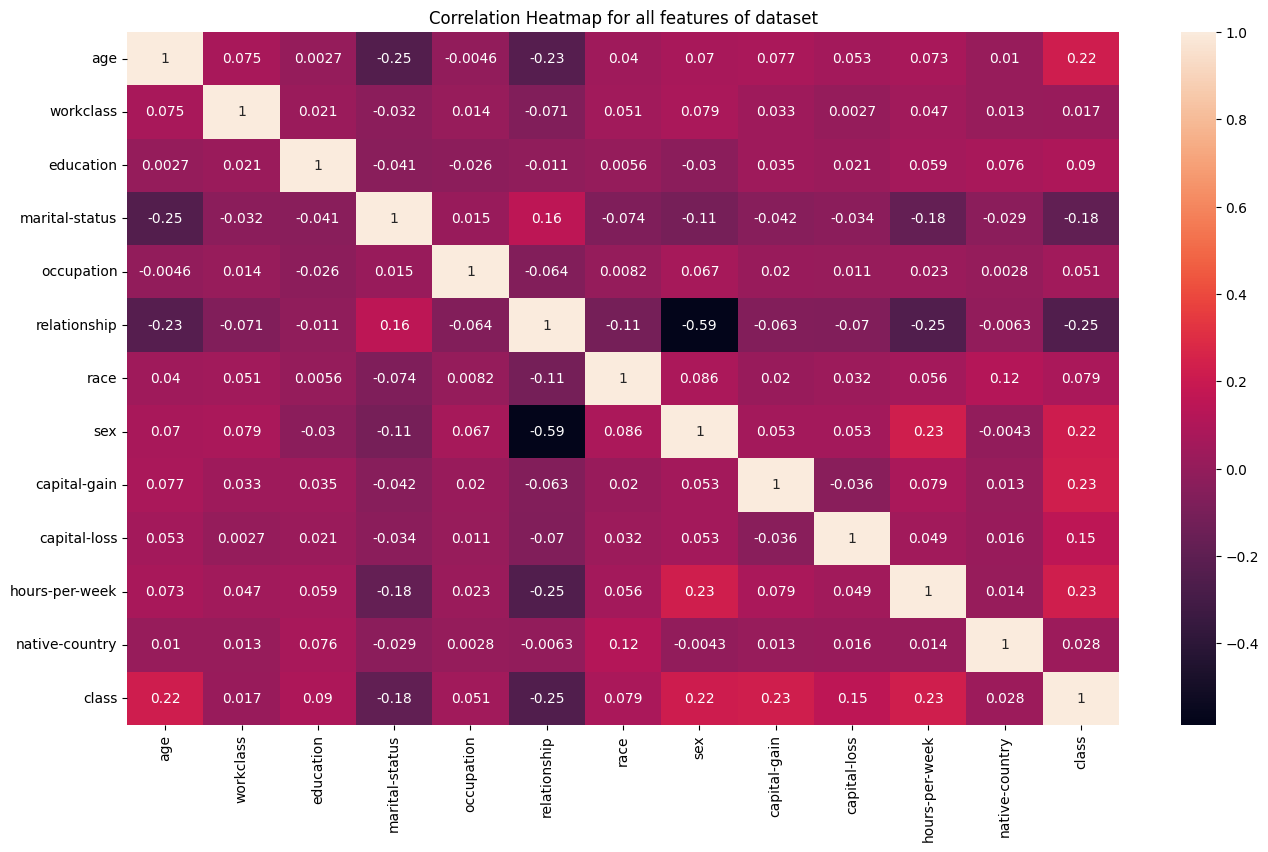

In [6]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
df = data_clean.copy()
for i in df.columns:
    if(df[i].dtype != 'object'):
      continue
    l.fit(df[i])
    df[i] = l.transform(df[i])

plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap for all features of dataset")

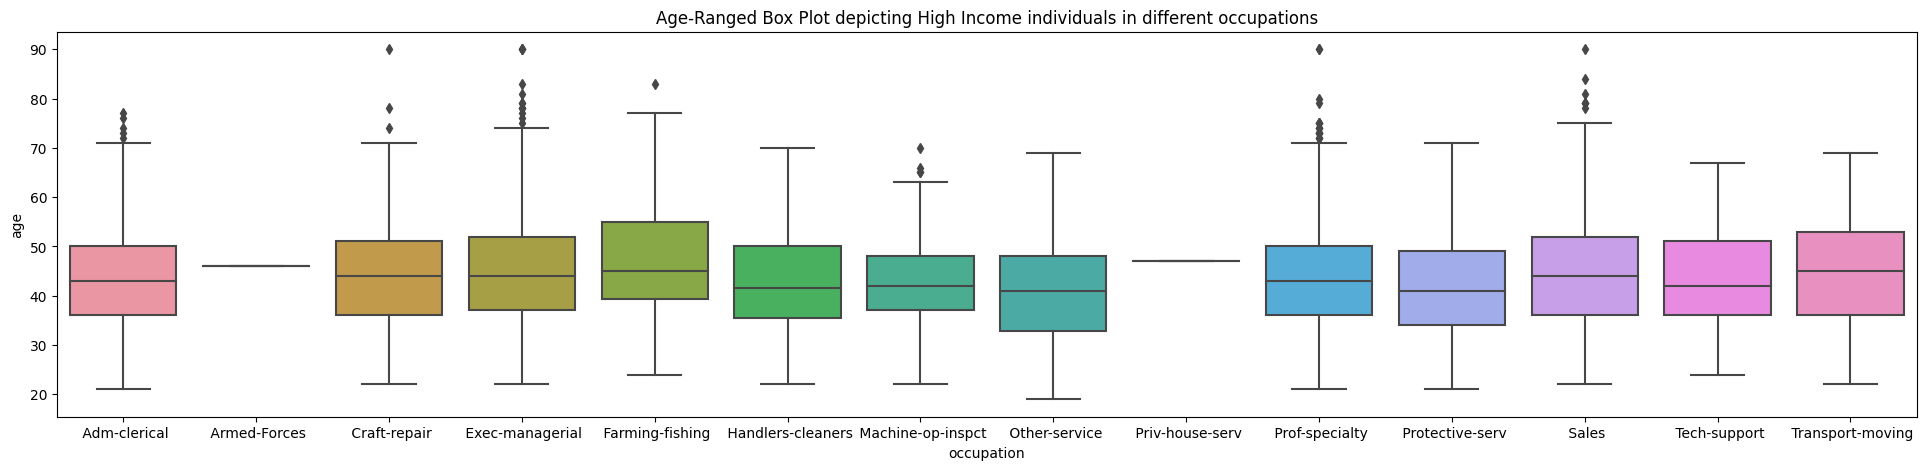

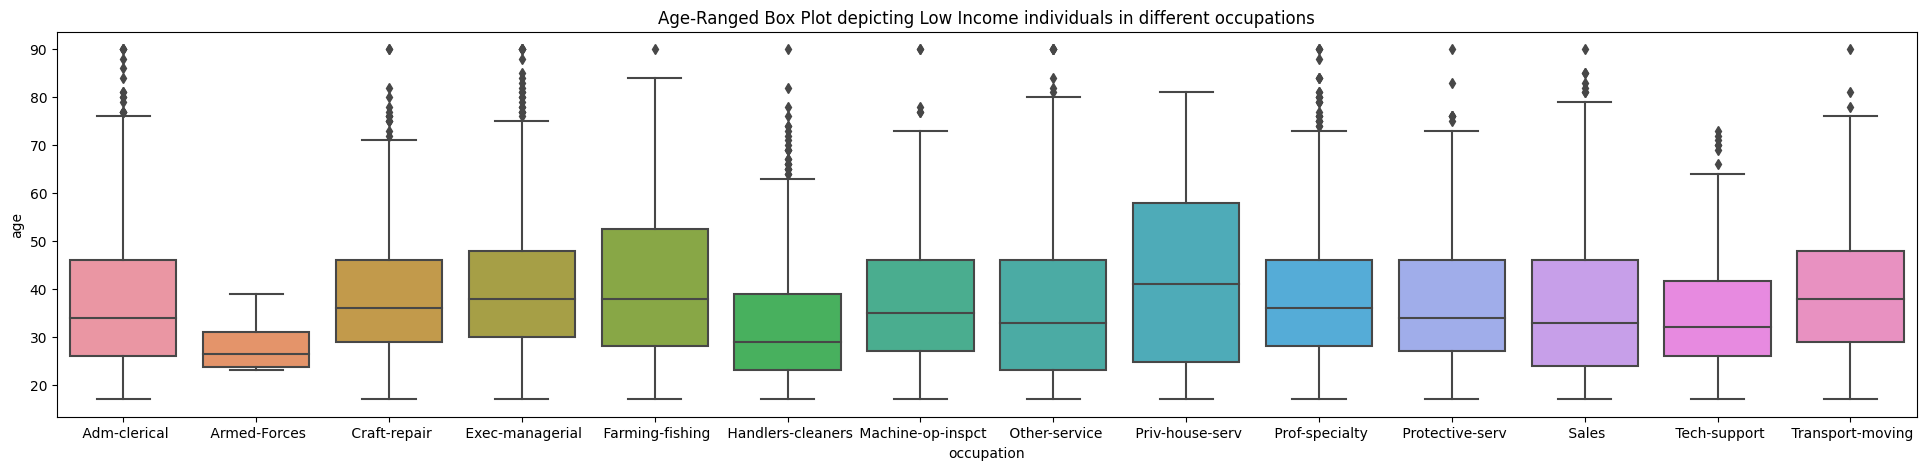

In [7]:
df_below = data_clean.loc[data_clean["class"]==" <=50K"]
df_above = data_clean.loc[data_clean["class"]==" >50K"]

fig, ax = plt.subplots(figsize = (24,5))
sns.boxplot(x='occupation', y='age', data=df_above.sort_values("occupation"))
plt.title("Age-Ranged Box Plot depicting High Income individuals in different occupations")
plt.show()

fig, ax = plt.subplots(figsize = (24,5))
sns.boxplot(x='occupation', y='age', data=df_below.sort_values("occupation"))
plt.title("Age-Ranged Box Plot depicting Low Income individuals in different occupations")
plt.show()

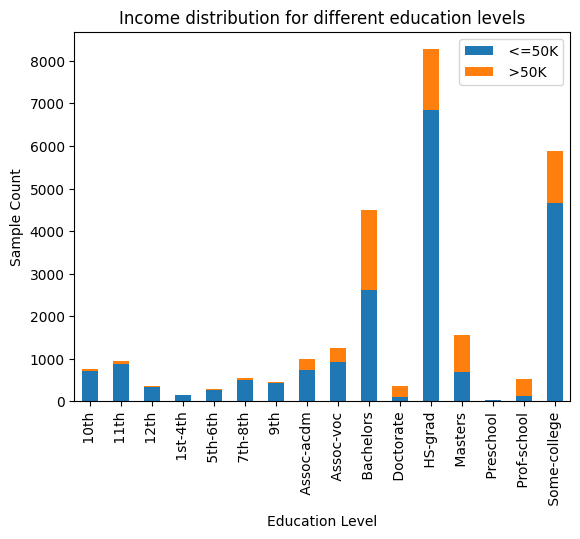

In [8]:
counts = pd.crosstab(data_clean['education'], data_clean['class'])
counts.plot(kind='bar', stacked=True)
plt.xlabel('Education Level')
plt.ylabel('Sample Count')
plt.title('Income distribution for different education levels')
plt.legend()
plt.show()

Text(0.5, 1.05, 'Gender-wise Income Distribution of Individuals in different Workclasses')

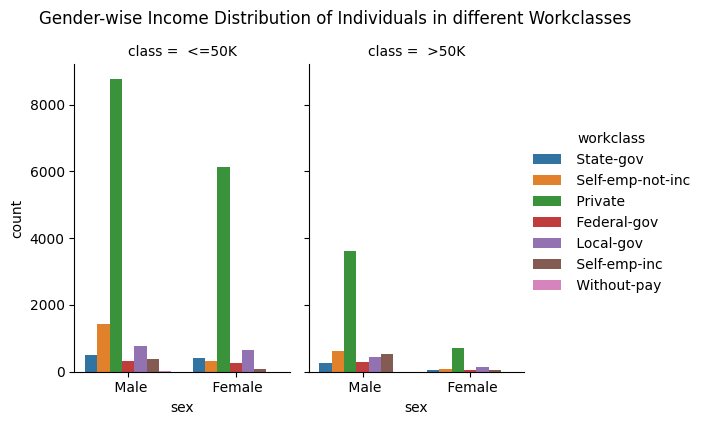

In [9]:
g = sns.catplot(x='sex', hue='workclass', col='class', data=data_clean, kind='count', height=4, aspect=.7)
plt.ylabel("Sample Count")
g.figure.suptitle("Gender-wise Income Distribution of Individuals in different Workclasses", y=1.05)

Text(0.5, 1.05, 'Gender-wise Income Distribution of Individuals with different Education Levels')

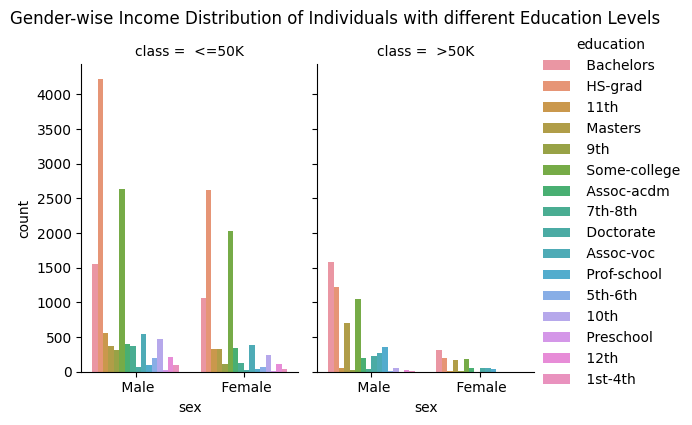

In [10]:
g = sns.catplot(x='sex', hue='education', col='class', data=data_clean, kind='count', height=4, aspect=.7)
plt.ylabel("Sample Count")
g.figure.suptitle("Gender-wise Income Distribution of Individuals with different Education Levels", y=1.05)

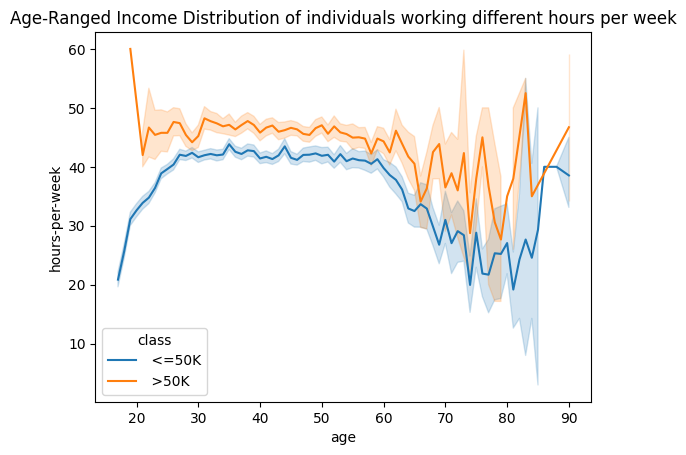

In [11]:
sns.lineplot(y='hours-per-week', x='age', hue='class', data=data_clean)
plt.title("Age-Ranged Income Distribution of individuals working different hours per week")
plt.show()

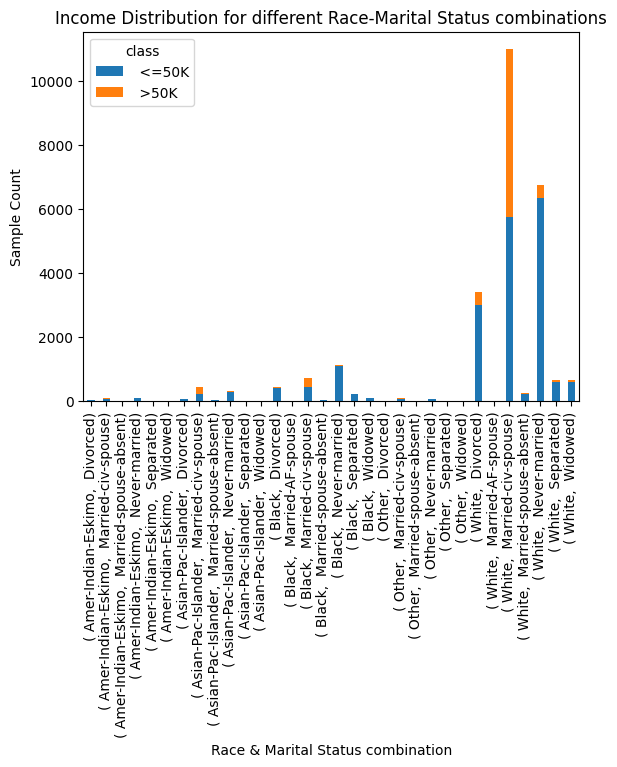

In [12]:
df = data_clean.copy()

grouped_df = df.groupby(['race', 'marital-status', 'class'])
counts = grouped_df.size().reset_index(name='count')

pivot = counts.pivot_table(index=['race', 'marital-status'], columns='class', values='count')
pivot.plot(kind='bar', stacked=True)

plt.title('Income Distribution for different Race-Marital Status combinations')
plt.xlabel('Race & Marital Status combination')
plt.ylabel('Sample Count')
plt.show()


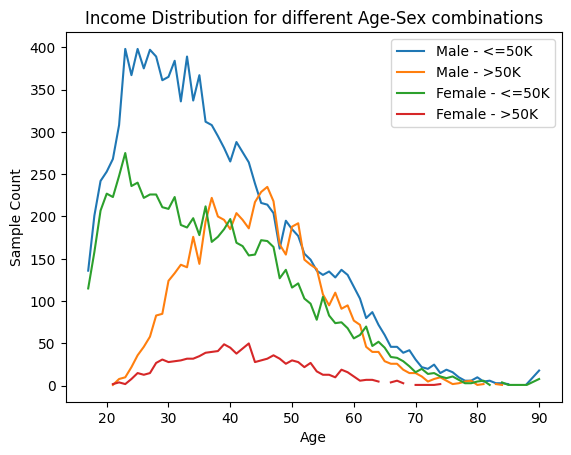

In [13]:
df = data_clean.copy()
grouped_df = df.groupby(['age', 'sex', 'class']).size().reset_index(name='count')
pivot = grouped_df.pivot(index='age', columns=['sex', 'class'], values='count')
plt.plot(pivot.index, pivot[' Male', ' <=50K'], label='Male - <=50K')
plt.plot(pivot.index, pivot[' Male', ' >50K'], label='Male - >50K')
plt.plot(pivot.index, pivot[' Female', ' <=50K'], label='Female - <=50K')
plt.plot(pivot.index, pivot[' Female', ' >50K'], label='Female - >50K')
plt.xlabel('Age')
plt.ylabel('Sample Count')
plt.title('Income Distribution for different Age-Sex combinations')
plt.legend()
plt.show()


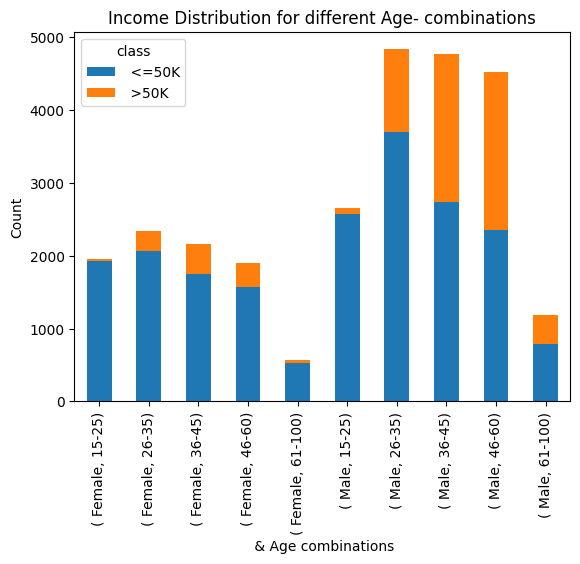

In [14]:
df = data_clean.copy()
age_bins = [15, 25, 35, 45, 60, 100]
age_labels = ['15-25', '26-35', '36-45', '46-60', '61-100']
df['age'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

grouped_df = df.groupby(['sex', 'age', 'class'])
counts = grouped_df.size().reset_index(name='count')

pivot = counts.pivot_table(index=['sex', 'age'], columns='class', values='count')
pivot.plot(kind='bar', stacked=True)

plt.title('Income Distribution for different Age- combinations')
plt.xlabel(' & Age combinations')
plt.ylabel('Count')
plt.show()

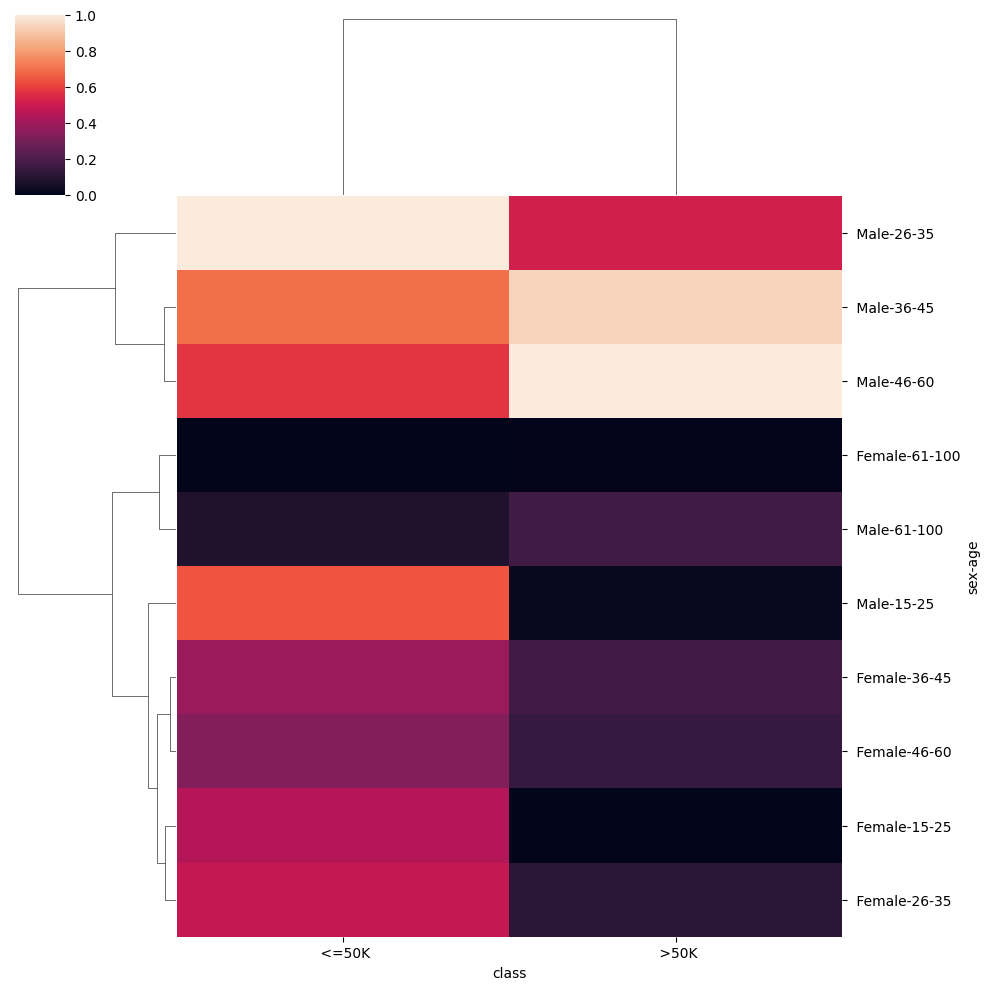

In [15]:
sns.clustermap(pivot, method='ward', standard_scale=1)

# Label Encoding

In [16]:
for i in data_clean.columns:
    if(data_clean[i].dtype != 'object'):
      continue
    l.fit(data_clean[i])
    data_clean[i] = l.transform(data_clean[i])

## Classification


### Evaluation

Your final model evaluation should be performed on the test set. Report the following metrics: 
- Overall accuracy
- Precision
- Recall
- F1 score

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

seed=0
train_subset, val_subset, test_subset = np.split(data_clean.sample(frac=1, random_state=seed), [int(.7*len(data_clean)), int(.85*len(data_clean))])

In [18]:
print("The training set has {} instances ({} high income, {} low income)".format(train_subset["class"].count(), train_subset["class"].value_counts()[1], train_subset["class"].value_counts()[0]))
print("The testing set has {} instances ({} high income, {} low income)".format(test_subset["class"].count(), test_subset["class"].value_counts()[1], test_subset["class"].value_counts()[0]))
print("The training set has {} instances ({} high income, {} low income)".format(val_subset["class"].count(), val_subset["class"].value_counts()[1], val_subset["class"].value_counts()[0]))

The training set has 18832 instances (4813 high income, 14019 low income)
The testing set has 4036 instances (1061 high income, 2975 low income)
The training set has 4036 instances (1006 high income, 3030 low income)


In [19]:
X_train = train_subset.iloc[:,[0,3,4,6,7,8,10]]
y_train = train_subset.iloc[:,-1]

X_val = val_subset.iloc[:,[0,3,4,6,7,8,10]]
y_val = val_subset.iloc[:,-1]

X_test = test_subset.iloc[:,[0,3,4,6,7,8,10]]
y_test = test_subset.iloc[:,-1]

In [20]:
model = KNeighborsClassifier(n_neighbors=16, metric='cosine', weights='uniform')
model.fit(X_train, y_train)

val_preds = model.predict(X_val)
test_preds = model.predict(X_test)

In [21]:
validationAccuracy = accuracy_score(y_val, val_preds)
validationF1score = f1_score(y_val, val_preds)
validtionPrecision = precision_score(y_val, val_preds)
validationRecall = recall_score(y_val, val_preds)
print("For Validation Dataset: \n")
print("Accuracy: ", validationAccuracy*100)
print("F1 Score: ", validationF1score*100)
print("Precision: ", validtionPrecision*100)
print("Recall: ", validationRecall*100)

testingAccuracy = accuracy_score(y_test, test_preds)
testingF1score = f1_score(y_test, test_preds)
testingPrecision = precision_score(y_test, test_preds)
testingRecall = recall_score(y_test, test_preds)
print("\nFor Testing Dataset: \n")
print("Accuracy: ", testingAccuracy*100)
print("F1 Score: ", testingF1score*100)
print("Precision: ", testingPrecision*100)
print("Recall: ", testingRecall*100)

For Validation Dataset: 

Accuracy:  81.34291377601586
F1 Score:  59.05383360522023
Precision:  65.1860744297719
Recall:  53.976143141153074

For Testing Dataset: 

Accuracy:  80.15361744301288
F1 Score:  58.561821003621326
Precision:  64.90825688073394
Recall:  53.34590009425071
